In [121]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as md
import datetime as dt
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU

In [122]:
pwd

'/home/peter/code/giadapi/crypto/notebooks'

In [123]:
vol_data = pd.read_csv('../raw_data/complete_vol_2023-03-14.csv', lineterminator='\n', index_col=0)

In [124]:
vol_data_cut = vol_data[['date','MA7_Sentiment','BTC_price']]

In [125]:
data['date'] = pd.to_datetime(data['date'])

In [126]:
# elon_add_BTC = data['date'][26]
# elon_add_BTC_anno = data['date'][31]
# elon_add_BTC_text = '''Elon Musk adds #bitcoin 
# to his twitter profile amind 
# rumours of Tesla accepting 
# Bitcoin payments'''
# elon_lose_BTC = data['date'][131]
# elon_lose_BTC_anno = data['date'][136]
# elon_lose_BTC_text = '''Tesla stops accepting Bitcoin 
# as payment for its cars due to 
# concerns about its carbon emissions'''

In [127]:
vol_data2

,date,MA7_Sentiment,BTC_price
7,2021-01-08,0.415417,40797.609375
8,2021-01-09,0.418275,40254.546875
9,2021-01-10,0.419726,38356.441406
10,2021-01-11,0.412316,35566.656250
11,2021-01-12,0.411199,33922.960938
...,...,...,...
799,2023-03-11,0.371627,20632.410156
800,2023-03-12,0.372813,22163.949219
801,2023-03-13,0.375752,24197.533203
802,2023-03-14,0.378136,24746.074219


/tmp/ipykernel_11650/1813621063.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vol_data2['date'] = pd.to_datetime(vol_data2['date'])


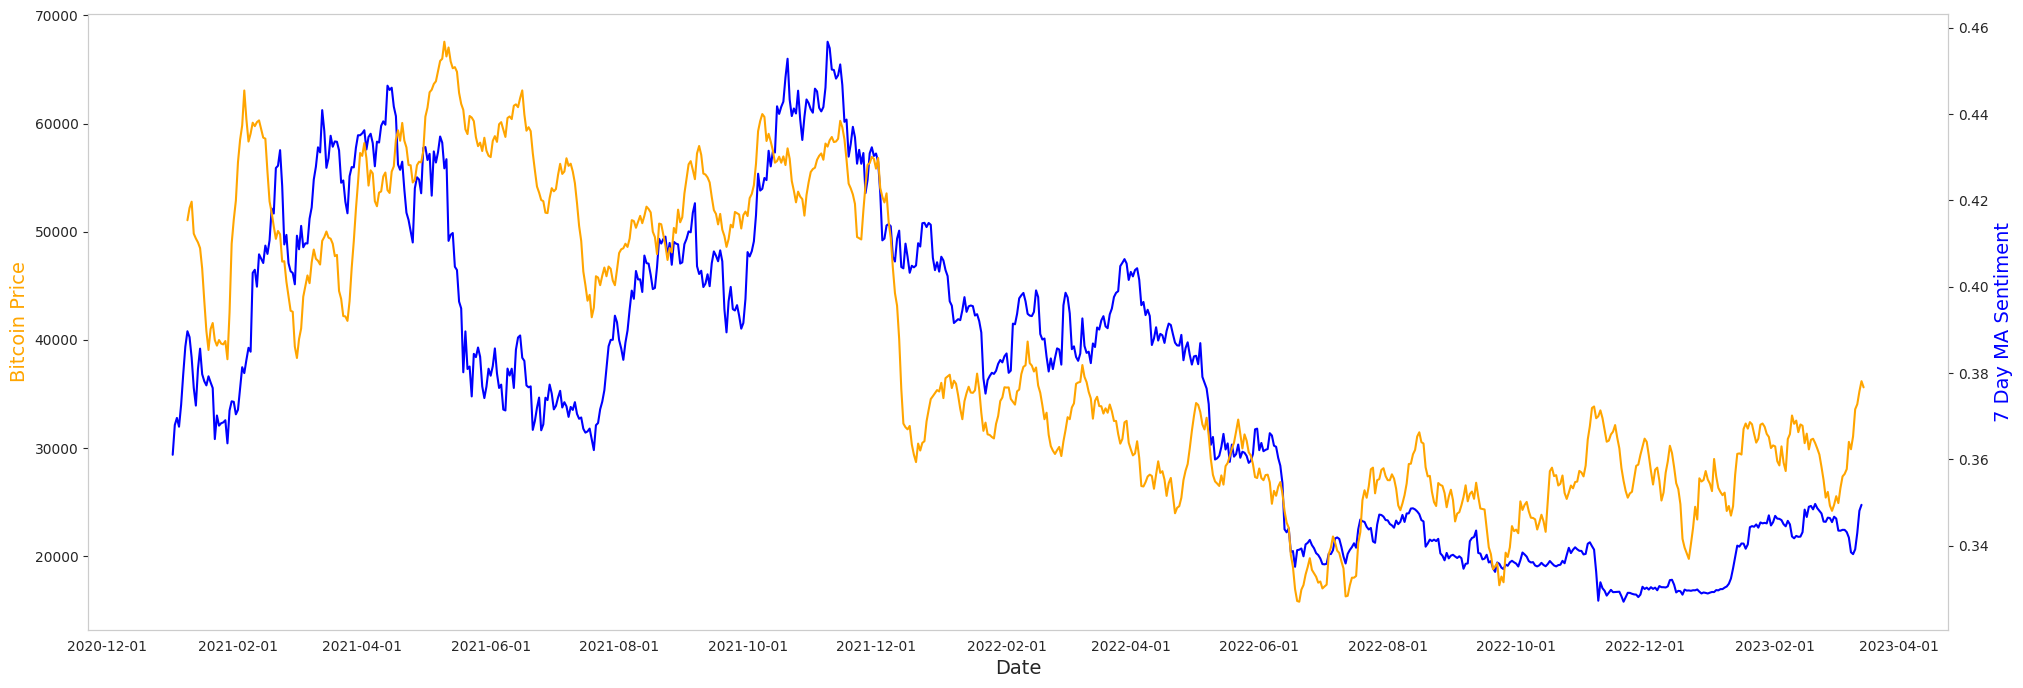

In [128]:
# matplotlib.rc_file_defaults()
vol_data2 = vol_data_cut.iloc[:,:]
vol_data2['date'] = pd.to_datetime(vol_data2['date'])
vol_data2['MA7_Sentiment']

ax1 = sns.set_style("whitegrid")

fig, ax1 = plt.subplots(figsize=(24,8))

sns.lineplot(x = vol_data2['date'], y=vol_data2['BTC_price'], sort = False, color='blue')
ax1.set_ylabel('Bitcoin Price',color='orange',fontsize=14)

ax2 = ax1.twinx()
sns.lineplot(x = vol_data2['date'], y=vol_data2['MA7_Sentiment'], sort = False, ax=ax2, color='orange').set_xticklabels

ax2.xaxis.set_major_locator(md.MonthLocator(interval=2))
ax2.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))

ax2.set_ylabel('7 Day MA Sentiment',color='blue',fontsize=14)
ax1.set_xlabel('Date',fontsize=14)
ax1.grid(False)
ax2.grid(False)

In [129]:
vol_data2['date'][803]

Timestamp('2023-03-15 00:00:00')

In [139]:
vol_data

,date,negative_bert,neutral_bert,positive_bert,daily_tweets,MA7_Sentiment,MA20_Sentiment,MA50_Sentiment,BTC_price,BTC_trading_volume
7,2021-01-08,0.115540,0.450721,0.433739,23346.012253,0.415417,NaN,NaN,40797.609375,8.810752e+10
8,2021-01-09,0.080486,0.471103,0.448410,18263.188301,0.418275,NaN,NaN,40254.546875,6.198416e+10
9,2021-01-10,0.086947,0.483889,0.429164,16174.363986,0.419726,NaN,NaN,38356.441406,7.998075e+10
10,2021-01-11,0.144872,0.494647,0.360480,27333.491470,0.412316,NaN,NaN,35566.656250,1.233206e+11
11,2021-01-12,0.103951,0.514071,0.381978,20311.306813,0.411199,NaN,NaN,33922.960938,7.477328e+10
...,...,...,...,...,...,...,...,...,...,...
799,2023-03-11,0.118417,0.483141,0.398441,21168.432091,0.371627,0.359184,0.362839,20632.410156,3.018029e+10
800,2023-03-12,0.137051,0.479557,0.383392,18621.077853,0.372813,0.359771,0.362830,22163.949219,2.927904e+10
801,2023-03-13,0.126823,0.496415,0.376762,24769.727538,0.375752,0.360913,0.362850,24197.533203,4.946636e+10
802,2023-03-14,0.101771,0.503114,0.395115,45600.116185,0.378136,0.363325,0.363191,24746.074219,5.462223e+10


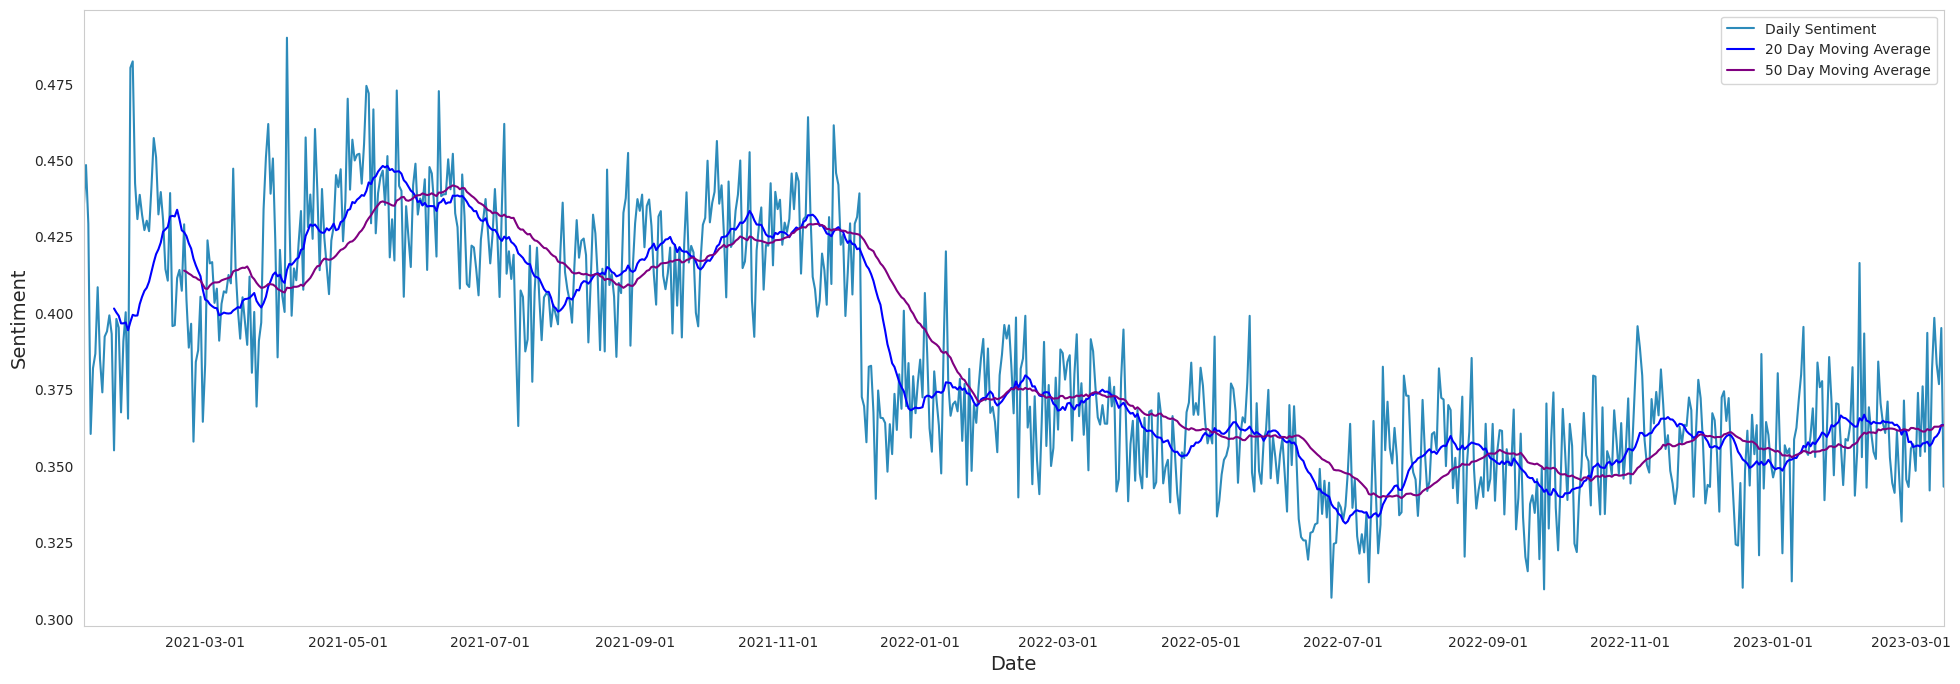

In [148]:
#this is the overall graph of sentiment vs price

# vol_data2 = vol_data_cut.iloc[7:,:]
vol_data['date'] = pd.to_datetime(vol_data['date'])

ax1 = sns.set_style("whitegrid")

fig, ax1 = plt.subplots(figsize=(24,8))

vol_data['Daily Sentiment'] =vol_data['positive_bert']
vol_data['20 Day Moving Average']= vol_data['MA20_Sentiment']
vol_data['50 Day Moving Average'] =vol_data['MA50_Sentiment']

ax1.plot(vol_data['date'], vol_data['Daily Sentiment'], color='#2D8BBA')
ax1.plot(vol_data['date'], vol_data['20 Day Moving Average'], color='blue')
ax1.plot(vol_data['date'], vol_data['50 Day Moving Average'], color='purple')


ax1.legend(vol_data[['Daily Sentiment','20 Day Moving Average','50 Day Moving Average']])
ax1.set_ylabel('Sentiment',fontsize=14)

# ax2 = ax1.twinx()
ax1.set_xlim(left = vol_data2['date'][7], right = vol_data2['date'][803])
# ax2.set_xlim(left= vol_data2['date'][7], right = vol_data2['date'][803])
# ax2.plot(vol_data2['date'], vol_data2['BTC_price'], color='#FF914D')
# ax2.set_ylabel('Bitcoin Price',color='#FF914D',fontsize=14)

ax1.xaxis.set_major_locator(md.MonthLocator(interval=2))
ax1.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))
ax1.set_xlabel('Date',fontsize=14)
ax1.grid(False)
# ax2.grid(False)


In [131]:
vol_data_cut.iloc[:180,:]

,date,MA7_Sentiment,BTC_price
0,2021-01-01,NaN,29374.152344
1,2021-01-02,NaN,32127.267578
2,2021-01-03,NaN,32782.023438
3,2021-01-04,NaN,31971.914062
4,2021-01-05,NaN,33992.429688
...,...,...,...
175,2021-06-25,0.420115,31637.779297
176,2021-06-26,0.419839,32186.277344
177,2021-06-27,0.417178,34649.644531
178,2021-06-28,0.417076,34434.335938


/tmp/ipykernel_11650/1725014440.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vol_data2['date'] = pd.to_datetime(vol_data2['date'])


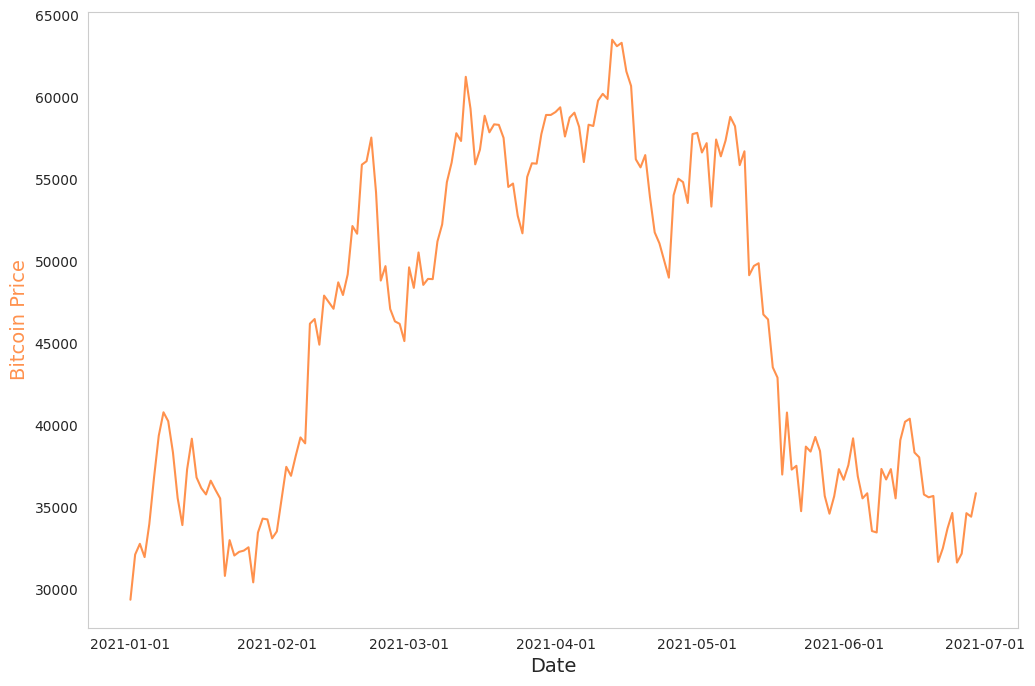

In [135]:
#this is the zoomed in graph of Elon Musk's affect

vol_data2 = vol_data_cut.iloc[:180,:]
vol_data2['date'] = pd.to_datetime(vol_data2['date'])
vol_data2['MA7_Sentiment']

ax1 = sns.set_style("whitegrid")

fig, ax1 = plt.subplots(figsize=(12,8))

ax1.plot(vol_data2['date'], vol_data2['BTC_price'], color='#FF914D')
# ax1.set_ylabel('7 Day MA Sentiment',color='#FF914D',fontsize=14)

# ax2 = ax1.twinx()
# ax1.set_xlim(left = vol_data2['date'][7], right = vol_data2['date'][179])
# ax2.set_xlim(left= vol_data2['date'][7], right = vol_data2['date'][179])
# ax2.plot(vol_data2['date'], vol_data2['BTC_price'], color='#FF914D')
ax1.set_ylabel('Bitcoin Price',color='#FF914D',fontsize=14)

ax1.xaxis.set_major_locator(md.MonthLocator())
ax1.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))
ax1.set_xlabel('Date',fontsize=14)
ax1.grid(False)
# ax2.grid(False)

In [133]:
vol_data2

,date,MA7_Sentiment,BTC_price
0,2021-01-01,NaN,29374.152344
1,2021-01-02,NaN,32127.267578
2,2021-01-03,NaN,32782.023438
3,2021-01-04,NaN,31971.914062
4,2021-01-05,NaN,33992.429688
...,...,...,...
175,2021-06-25,0.420115,31637.779297
176,2021-06-26,0.419839,32186.277344
177,2021-06-27,0.417178,34649.644531
178,2021-06-28,0.417076,34434.335938


NameError: name 'elon_add_BTC' is not defined

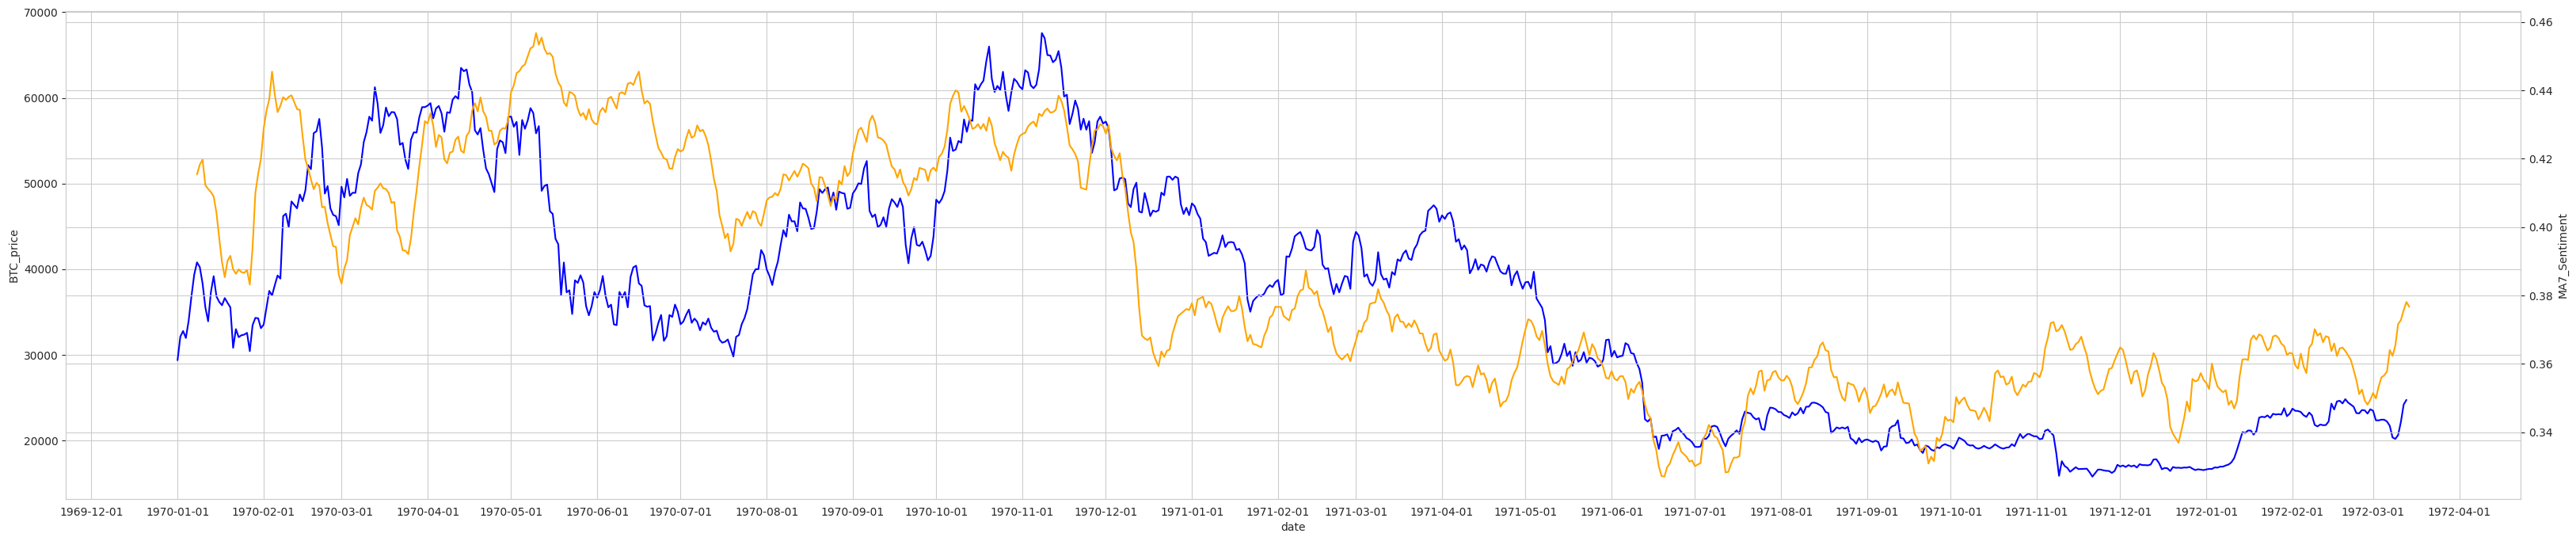

In [134]:
matplotlib.rc_file_defaults()

ax1 = sns.set_style("whitegrid")

fig, ax1 = plt.subplots(figsize=(40,8))

sns.lineplot(x = data2['date'], y=data2['BTC_price'], sort = False, color='blue',legend='brief')

ax2 = ax1.twinx()
sns.lineplot(x = data2['date'], y=data2['MA7_Sentiment'], sort = False, ax=ax2, color='orange',legend='brief').set_xticklabels
ax2.xaxis.set_major_locator(md.MonthLocator())
ax2.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))
ax2.axvline(elon_add_BTC, color = 'red')
ax2.axvline(elon_lose_BTC, color = 'red')

ax1.legend(data2[['BTC_price','MA7_Sentiment']], loc='upper right')

plt.text(x=elon_add_BTC_anno, y=0.34,s=elon_add_BTC_text, horizontalalignment='left', size='medium', color='black', weight='semibold', backgroundcolor = 'white')
plt.text(x=elon_lose_BTC_anno, y=0.34,s=elon_lose_BTC_text, horizontalalignment='left', size='medium', color='black', weight='semibold', backgroundcolor = 'white')

plt.grid()


In [ ]:
np.random.randn(20, 3)

In [ ]:
#make graph for positive:neutral:negative sentiment over the last 50 days 

In [ ]:
data2.head()

In [ ]:
data2['daily_tweets'] = data3.reset_index()['daily_tweets']
data2['BTC_price']=BTC_price.reset_index()['Adj Close']

In [ ]:
data2 = data.iloc[-50:]
data['pos_neg_ratio'] = data['positive_bert']/data['negative_bert']
data['pos_neg_ratio'] = data['positive_bert']/data['negative_bert']
max_ = data['positive_bert'].max()
min_ = data['positive_bert'].min()
data['pos_adj'] = ((data['positive_bert'])/(data['positive_bert'] + data['negative_bert']))
data['neg_adj'] = ((data['negative_bert'])/(data['positive_bert'] + data['negative_bert']))



In [ ]:

data.head()

In [55]:
data2 = data.iloc[-30:]
# fig, ax = plt.subplots()
ax = plt.figure(figsize=(10,2))
data2['neg_adj']=data2['negative_bert']/ (data2['negative_bert'] + data2['positive_bert'])
data2['pos_adj']=data2['positive_bert']/ (data2['negative_bert'] + data2['positive_bert'])
# fig.xaxis.set_major_locator(md.DayLocator())
plt.stackplot(data2.date, data2.neg_adj, data2.pos_adj)
scale_y_continuous(labels = function(x) paste0(x*100, "%"))


SyntaxError: invalid syntax. Perhaps you forgot a comma? (1236326492.py, line 8)

In [ ]:
data2.tail()

In [ ]:
# sns.lineplot(data = data2['BTC_price_adjclose'], marker='o', sort = False)
# sns.lineplot(data = data2['MA7_Sentiment'], marker='o', sort = False)

sns.lineplot(data=data3)

In [ ]:
data2['bitcoin_volume'] = BTC_price['Volume']

In [ ]:
data2.tail()

In [ ]:
data2 = data2[['date','negative_bert', 'neutral_bert', 'positive_bert',
       'daily_tweets', 'MA7_Sentiment', 'MA20_Sentiment',
       'MA50_Sentiment', 'BTC_price']]

In [ ]:
# data2 = data2.rename(columns={"negative_bert": "average_neg", "neutral_bert": "average_neu", "positive_bert": "average_pos", 'BTC_new':'BTC_price'}),

In [ ]:
data2.to_csv('all_columns_daily_090323.csv')